# Predicting Customer Life Time Value (CLTV) via Beta Geometric / Negative Binominal Distribution (BG/NBD) and Gamma Gamma Model

# 1-INTRODUCTION


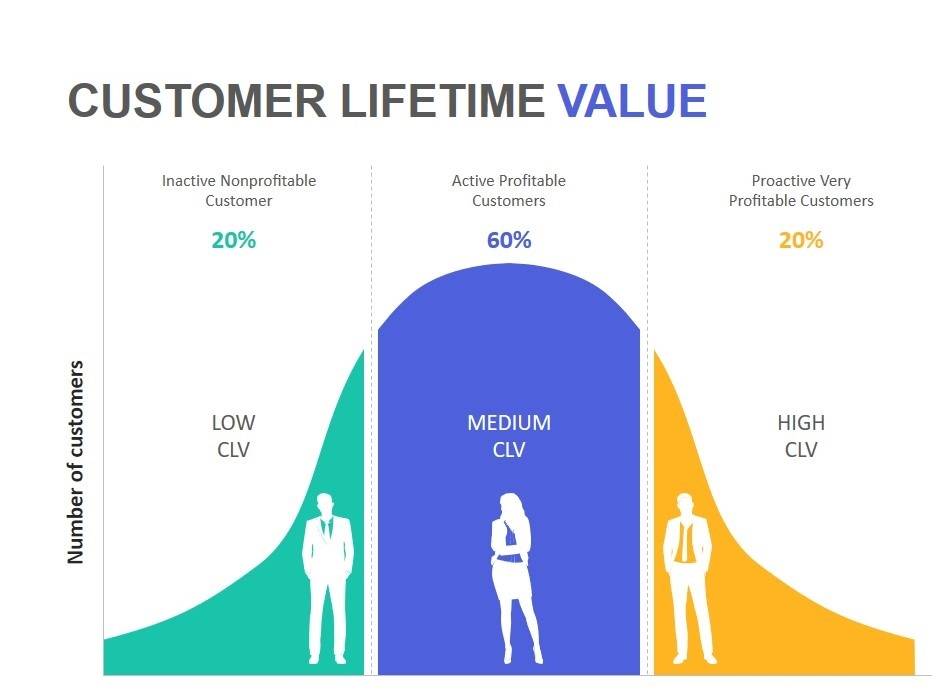


**CUSTOMER LIFETIME VALUE**

CLTV is a measurement of how valuable a customer is to your company, not just on a purchase-by-purchase basis but across the whole relationship. Probabilistic lifetime value estimation is made with time projection for a certain t time. CLTV is a dynamic concept, not a static model. 

The most basic formula we use is as follows:


**CLTV = Expected Number of Transaction * Expected Average Profit**


We will estimate the “Expected Number of Transaction” part using the BG/NBD model and the “Expexed Average Profit” part using the gamma gamma model.

Before moving on to the explanation of the models, I would like to explain the concept of buy till you die. We actually create the BG/NBD model using the concept of Buy till you die.

**BUY TILL YOU DIE MODEL**

Buy Till You Die model fit probabilistic models to historical transactional data to calculate customer lifetime value. BYTD model answers these kind of questions:

1. How many customers are active?
2. How many customers will be active one year from now?
3. Which customers have churned?
4. How valuable will any customer be to the company in the future?

**Transaction Process (Buy)**

As long as it is alive, the number of transactions to be performed by a client in a given time period is poisson distributed with the transaction rate parameter.
In other words, as long as a customer is alive, he or she will continue to make random purchases around her own transaction rate.
Transaction rates vary for each client and are gamma distributed for the entire population. (r,alpha)

**Dropout process (Till You Die)**

Each customer has a dropout rate (dropout probability) with probability p.
A customer will churn with a certain probability after making a purchase.
Dropout rates vary for each client and are beta distributed for the entire population. (a,b)




# HISTORY

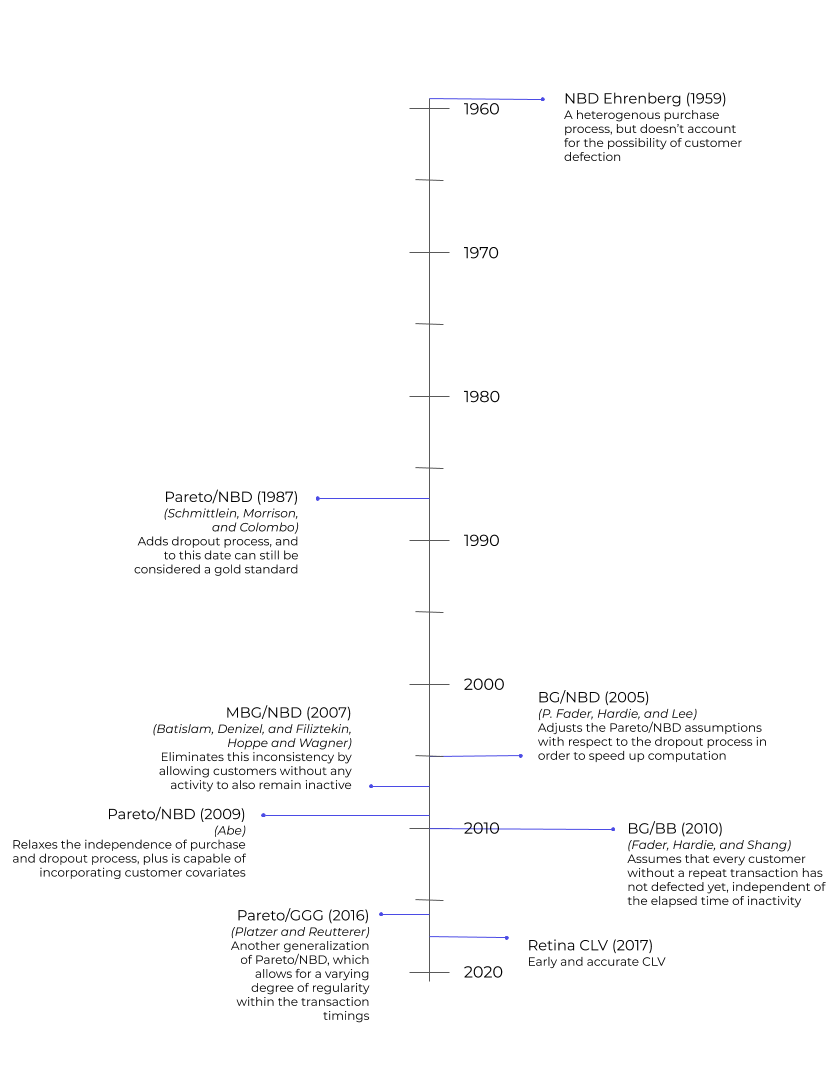

•NBD (Ehrenberg 1959)

•Pareto/NBD Schmittlein, Morrison, and Colombo 1987)

•BG/NBD (P. Fader, Hardie, and Lee 2005)

•Pareto/NBD (HB) Ma and Liu (2007)

•MBG/NBD Batislam, Denizel, and Filiztekin (2007), Hoppe and Wagner (2007)

•Pareto/NBD (Abe) Abe (2009)

•BG/BB (Fader, Hardie, and Shang 2010)

•Pareto/GGG Platzer and Reutterer (2016)



The original NBD model from 1959 functions as a benchmark for later models because it’s based on a heterogenous purchase process. But, NBD doesn’t account for customer churn.

The next model, Pareto/NBD from 1987, adds a heterogeneous dropout process and is considered one of the top buy-til-you-die models.

Next up, the BG/NBD model adjusts assumptions to reduce computation time and offers a more robust parameter search. However, this model assumes customers without repeat transactions have not churned.

MBG/NBD removes inconsistencies with the former model by allowing customers without any activity to remain inactive.

The newer BG/CNBD-k and MBG/CNBD-k models improve forecasting accuracy by allowing for regularity in transaction times. If this regularity exists, these new models can result in much more accurate customer-level predictions.

The variants of Pareto/NBD models by Ma and Liu (2007) and by Abe (2009) utilize MCMC simulation to allow for more flexible assumptions. The first model, Pareto/NBD (HB) is a hierarchical Bayes variant that tests out this approach while sticking to the original model’s assumptions. The second variation, Pareto/NBD (Abe), can incorporate covariates.

Pareto/GGG is a third variation of Pareto/NBD that accounts for some level of regularity for inter-transaction times.


# 2-Beta Geometric / Negative Binominal Distribution (BG/NBD) MODEL

Fader, Hardie and Lee, they present the BG/NBD model as an alternative to the Pareto/NBD.
The positioning of work is that the model yields very similar results to the Pareto/NBD while being vastly easier to implement. 

1.	While active, transactions made by a customer in time period t is Poisson distributed with mean λt
2.	Differences in transaction rate between customers follows a gamma distribution with shape r and scale α
3.	Each customer becomes inactive after each transaction with probability p
4.	Differences in p follows a beta distribution with shape parameters a and b

It should be so that we capture the buying pattern of the whole population and then find a pattern that will personalize the buying of this whole population..

In summary, what it will do is learn the mass behavior from these individual behaviors and then make a probabilistic estimation specific to the individual.

The following should not be forgotten: After making a purchase, the customer becomes partial churn. 

The BG/NBD Model probabilistically models two processes for the expected number of transactions.

*First Process:* Transaction Process (**Buy**)

*Second Process:* Dropout process (**Till You Die**) --> process of becoming churn


Formula

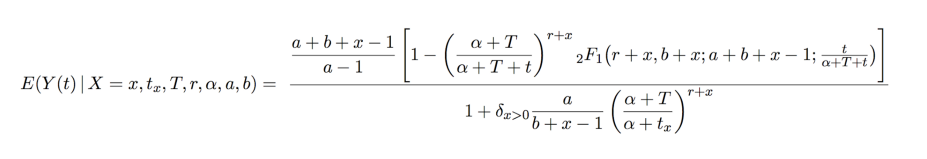



x --> frequency of customers who have made at least two purchases

tx --> customer's recency value (must be calculated individually for each customer)

T --> Time since the customer's first purchase. Age of customer for company. Tenure.

r, alfa --> difference in transaction rate between customers parameters of gamma distribution

a,b --> Beta distribution parameters expressing drop rate

In other words, x, tx and T are the characteristics of individuals.

As a result, it will give the expected values of purchase values in a certain t period while taking values specific to individuals and carrying the characteristics of the population.

In the light of the gamma and beta distribution that we will learn from the population, the characteristics of the individual and the expected y value in a certain t period will be estimated.

2F1 is the Gaussian hypergeometric function


r,alpha,a,b are estimated using the maximum likelihood method

*NOTE-1*

**Gamma distribution**

The gamma distribution is a two-parameter family of continuous probability distributions. The exponential distribution, Erlang distribution, and chi-square distribution are special cases of the gamma distribution. There are two different parameterizations in common use:

•	With a shape parameter k and a scale parameter θ.

•	With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.

In each of these forms, both parameters are positive real numbers.

The gamma distribution is the maximum entropy probability distribution

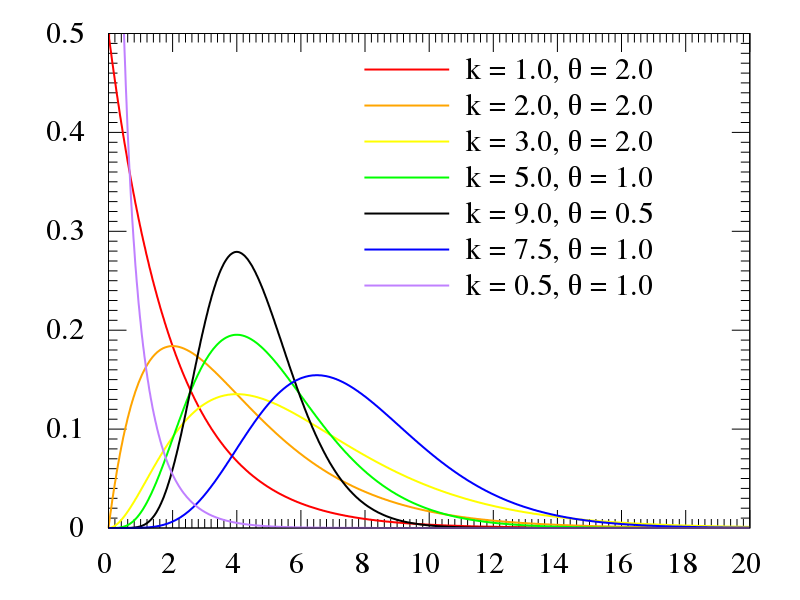


*NOTE-2*

**Beta distribition**

The beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parameterized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines.

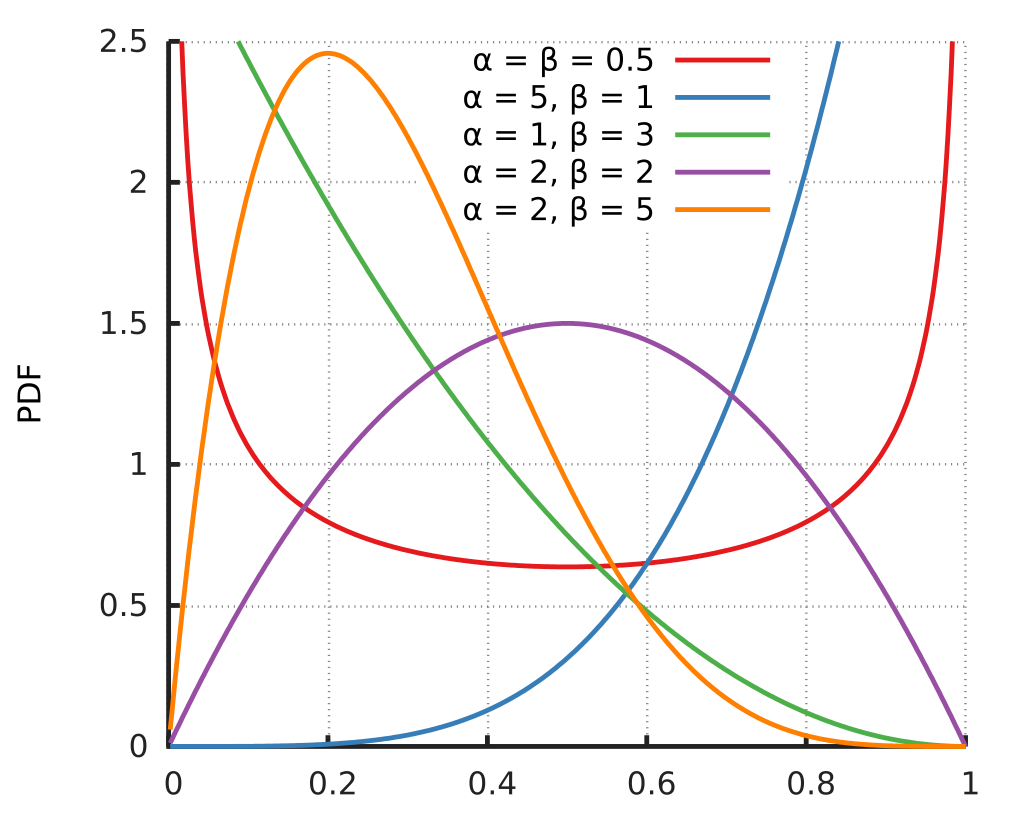


# 3-Gamma Gamma Model

The monetary value of a customer’s given transaction varies randomly around their average transaction value.

Average transaction values vary across customers but do not vary over time for any given individual.

The distribution of average transaction values across customers is independent of the transaction process. 

The average transaction value is gamma distributed among all customers.

Formula:

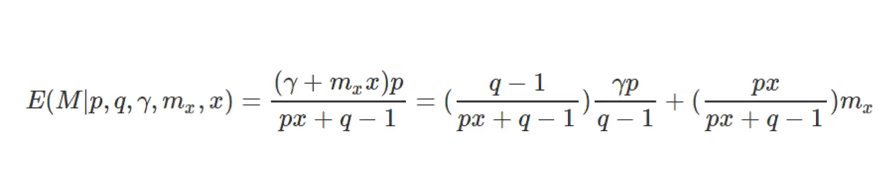

mx and x parameters come from user

x--> Frequency. The number of recurring sales (transactions made at least 2 times)

mx --> Monetary. Observed transaction value.

The p,q and y  are parameters from distribution

With these parameters, the expected monetary value will be estimated.


# 4-CLTV BG/NBD&GAMMA GAMMA Implementation

Data Set : https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

**Attribute Information:**

**InvoiceNo:** *Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.*

**StockCode:** *Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.*

**Description:** *Product (item) name. Nominal.*

**Quantity:** *The quantities of each product (item) per transaction. Numeric.*

**InvoiceDate:** *Invice date and time. Numeric. The day and time when a transaction was generated.*

**UnitPrice:** *Unit price. Numeric. Product price per unit in sterling .*

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country:** *Country name. Nominal. The name of the country where a customer resides.*


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Importing required libraries
!pip install lifetimes

import datetime as dt
import numpy as np
import pandas as pd
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Pandas set option
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
#Importing data
dataframe = pd.read_csv("../input/online-retail-ii-uci/online_retail_II.csv")

In [ ]:
check_df(dataframe)

In [ ]:
dataframe.head()

In [ ]:
#Should transform InvoiceDate to datetime
dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])


In [ ]:
dataframe = dataframe[dataframe["InvoiceDate"]< "2011-01-01"]

In [ ]:
#Backup dataframe 
df = dataframe.copy()

In [ ]:
check_df(df)

In [ ]:
#We delete them incomplete information because it is customer-oriented
df.dropna(axis=0, inplace=True)


#The dataset has sales return invoice. We need to eliminate them
df = df[~df["Invoice"].str.contains("C", na=False)]

#As you can see, the negative values are available in price and quantity values.We need to eliminate them too.
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
        
#We need to push quantity and price values for better results
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")
        
#Finally, we are creating a total price variable by multiplying the quantity and price values
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [ ]:
check_df(df)

In [ ]:
def cltv_prediction(dataframe, month=3, plot=False):
    
    #We need to choose an analysis date. The latest data belongs to the following date and we choose 2 days after that date
    #df["InvoiceDate"].max() --> "2010-12-23"
    today_date = dt.datetime(2010, 12, 25)
    #We do grouping according to customer ids and calculate the following values
    #Recency--> Time passing over the customer's final purchase
    #T --> Time since the customer's first purchase. Age of customer for company. Tenure.
    #Frequency --> Frequency. The number of recurring sales.
    #Monetary --> Observed transaction value.
    cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                         lambda date: (today_date - date.min()).days],
                                             'Invoice': lambda num: num.nunique(),
                                             'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    
    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
    
    #Calculate the frequency and recency values as weekly
    cltv_df["recency"] = cltv_df["recency"] / 7
    cltv_df["T"] = cltv_df["T"] / 7
    
    #By definition, we choose customers greater than 1 frequency
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

    # Establishment of the BG-NBD model
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])


    #cltv_df["expected_purc_1_month"] = bgf.predict(4, cltv_df['frequency'], cltv_df['recency'], cltv_df['T'])

    # 3. Establishment of the GAMMA-GAMMA model
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                                 cltv_df['monetary'])

    # Calculation of CLTV via BG-NBD and GG model.
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month,
                                       freq="W",  # The frequency information of t.
                                       discount_rate=0.05)

    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    
    #If scaler is wanted to use
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(cltv_final[["clv"]])
    cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

    cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 5, labels=["about_to_sleep", "at_risk", "need_attention","loyal_customers", "champions"])
    
    if plot:
        plot_probability_alive_matrix(bgf)
        
        plot_period_transactions(bgf)       
        
        
    return cltv_final

In [ ]:
cltv_6m = cltv_prediction(df, month=6 , plot=True)

In [ ]:
cltv_6m.groupby("segment")["clv"].describe()

# 5 BG/NBD Model Validation

We need to devote our model with two different sets of cross-validation method. 
We will then use the holdout dataset as production data, fit a new BG/NBD model on calibration data, and compare the predicted and actual number of repeat purchases over the holdout period.
In my next article, I will give more detailed information about how the validation process will be.



# 6-INCREASE CUSTOMER LIFETIME VALUE

**Provide 24/7 Support**

The customer always wants to reach the company instantly. For this reason, an infrastructure should be established to serve the customer 24 hours a day, 7 days a week. The customer's problem should be resolved as soon as possible and the customer should be satisfied.

**Monitor Social Media**

It is very important to reach the customer through social media in these days when the internet has become widespread. New products and campaigns should be promoted, and if necessary, the customer with a problem should be dealt with individually. Bearing in mind the risks, your team must have at least one employee focused on tracking and replying to social media comments.

**Launch a loyalty program**

Retaining a customer is easier and less costly than acquiring a new customer.  If there is not, a customer loyalty card should be created. This card can be physical or online. With this card, the customer should be encouraged to collect stars or similar items and encourage more shopping. Discounts can be defined on the customer's birthdays or special days.

**Use Up-Sells and Cross-Sells**

It may seem like a traditional method, but it still works. More monetary should be provided than the customer by encouraging the customer with up-sell or cross-selling. While doing this, the customer should not feel deceived.

**Monitor the feedback**

Feedback from the customer should not be ignored. Small problems can lead to bigger problems. Bad information spreads faster than good information on the internet. Nobody wants the company name to be badly mentioned. For this reason, the problem should be solved as soon as possible.


# 7-CONCLUSION

With the widespread use of the internet and gig economies, competition is now at its highest level. In this direction, it is very important to understand the customer. It is a known fact that it is more costly for companies to reach a new customer than to retain an existing customer. For this reason, it is very important to know which customer will make how much profit and how often they will shop. It is necessary to calculate these values correctly and to reach the customer who will be churn correctly. It is known that there are many computational methods. In this article, I wanted to show how to make a calculation using BG/NBD and gamma gamma models. Reaching the customer at the right time is as important as calculating correctly. These methods differ for companies. Companies should use and implement their own methods. Thank you for reading and taking the time to read my article.


# References

https://www.veribilimiokulu.com/

https://retina.ai/academy/lesson/history-of-buy-til-you-die-btyd-models/

Peter S.Fader, Bruce G.S. Hardie, Ka Lok Lee. December 2008

https://en.wikipedia.org/wiki/Gamma_distribution

https://en.wikipedia.org/wiki/Beta_distribution

Peter S.Fader, Bruce G.S. Hardie. February 2013

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

https://towardsdatascience.com/what-is-your-customers-worth-over-their-lifetime-dfae277fd166


